#### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.   

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.


#### Aim : Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

Dataset:
Train dataset - train.csv Test Dataset - test.csv

In [1]:
#Importing the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#Train Data
data = pd.read_csv(r"A:\Desktop\Desktop\train.csv")
data.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [2]:
#Test dataset
test_data = pd.read_csv(r"A:\Desktop\Desktop\test.csv")
test_data.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Exploratory Data Analysis

In [3]:
print('Shape of Train data :', data.shape)
print("Shape of Test data :", test_data.shape)

Shape of Train data : (159571, 8)
Shape of Test data : (153164, 2)


We have 159,571 records and 8 columns including the target variable in the train dataset. In the test dataset, we have 153,164 records and two features.

In [4]:
data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

We have string and integer type of data in the train dataset.

In [5]:
test_data.dtypes

id              object
comment_text    object
dtype: object

We only have string type of data in the test dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


We have 159,571 non-null values in all the columns of train dataset.

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


We have 153,164 non-null values in all the columns of test dataset.

In [8]:
data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
test_data.columns

Index(['id', 'comment_text'], dtype='object')

### Features in Dataset(Independent Variable)

Data Set Description


The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:

`Highly Malignant` : It denotes comments that are highly malignant and hurtful. 

`Rude` : It denotes comments that are very rude and offensive.

`Threat` : It contains indication of the comments that are giving any threat to someone. 	

`Abuse` : It is for comments that are abusive in nature. 

`Loathe` : It describes the comments which are hateful and loathing in nature.  

`ID` : It includes unique Ids associated with each comment text given.   

`Comment`  text` : This column contains the comments extracted from various social media platforms. 


### Target in dataset(Dependent Variable)

`Malignant` : It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

### Exploring the Categorical Variables

In [10]:
#Categorical columns in the dataset
for i in data.columns:
    if data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(data[i].nunique())
        print(data[i].unique())
        missing = data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

id
**************************************************
159571
['0000997932d777bf' '000103f0d9cfb60f' '000113f07ec002fd' ...
 'ffee36eab5c267c9' 'fff125370e4aaaf3' 'fff46fc426af1f9a']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
comment_text
**************************************************
159571
["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUm

In [11]:
#Categorical columns in the dataset
for i in test_data.columns:
    if test_data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(test_data[i].nunique())
        print(test_data[i].unique())
        missing = test_data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

id
**************************************************
153164
['00001cee341fdb12' '0000247867823ef7' '00013b17ad220c46' ...
 'fffda9e8d6fafa9e' 'fffe8f1340a79fc2' 'ffffce3fb183ee80']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
comment_text
**************************************************
153164
["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
 '== From RfC == \n\n The title is fine as it is, IMO.'
 '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "' ...
 '" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is ""more correct.""  I had gotten confused, but then found this: \n :

The column 'id' is provided as an identifier for each comments in train and test dataset. So, we can drop these columns from both dataset.

In [12]:
data.drop('id',axis = 1, inplace = True)
test_data.drop('id', axis = 1, inplace = True)

### Text Processing

Let's check few comments from users from the train dataset.

In [13]:
print(data['comment_text'].iloc[1])
print("-"*120)
print(data['comment_text'].iloc[8])
print("-"*120)
print(data['comment_text'].iloc[12])
print("-"*120)
print(data['comment_text'].iloc[24])
print("-"*120)
print(data['comment_text'].iloc[33])
print("-"*120)

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
------------------------------------------------------------------------------------------------------------------------
Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169
------------------------------------------------------------------------------------------------------------------------
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them qu

We can see that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to process the text.

In [14]:
#User defined function for unshrinking the short form words, removing the comments which are in other languages, removing urls and other unwanted text
import re
def clean_text(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [15]:
#Train data
# Changing all words to Lowercase
data['comment_text'] = data['comment_text'].apply(lambda x : str(x).lower())
data['comment_text'] = data['comment_text'].apply(lambda x : clean_text(x))

#Test data
test_data['comment_text'] = test_data['comment_text'].apply(lambda x : str(x).lower())
test_data['comment_text'] = test_data['comment_text'].apply(lambda x : clean_text(x))



We can check the same data again.

In [16]:
print(data['comment_text'].iloc[1])
print("-"*120)
print(data['comment_text'].iloc[8])
print("-"*120)
print(data['comment_text'].iloc[12])
print("-"*120)
print(data['comment_text'].iloc[24])
print("-"*120)
print(data['comment_text'].iloc[33])
print("-"*120)

d'aww! he matches this background colour i am seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)
------------------------------------------------------------------------------------------------------------------------
sorry if the word 'nonsense' was offensive to you. anyway, i am not intending to write anything in the article(wow they would jump on me for vandalism), i am merely requesting that it be more encyclopedic so one can use it for school as a reference. i have been to the selective breeding page but it is almost a stub. it points to 'animal breeding' which is a short messy article that gives you no info. there must be someone around with expertise in eugenics? 93.161.107.169
------------------------------------------------------------------------------------------------------------------------
hey... what is it..
@ | talk .
what is it... an exclusive group of some wp talibans...who are good at destroying, self-appointed purist who gang up any one who asks the

Now the data looks clean from unwanted text and other characters.

### Removing StopWords

In [17]:
import nltk
from nltk.corpus import stopwords


stop_word = set(stopwords.words('english'))

    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","d'aww!","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")

stop_word.update(custom_words)

print(stop_word)

{'who', "you've", 'hadn', 'my', 'each', 'wouldn', 'and', 'himself', 'as', 'she', 'at', 'once', 'for', 'by', "d'aww", 'needn', 'this', 'yolo', 'your', 'were', "mustn't", 'nor', 'her', 'weren', 'few', 'itself', 'him', 'only', "wouldn't", 'ikr', 'with', 'didn', 'o', 'hmm', "shan't", "there's", "can't", "she'll", 'until', "isn't", 'shan', 'in', "should've", 'so', 'a', 'ain', 'of', "won't", 'or', "i've", 'nvm', 'am', 'very', 'is', 'same', 'why', 'their', 'down', 'he', 'won', 'from', 'should', 'off', 'these', "he'll", 'smh', 'hi', 'but', 'above', 'ours', 'd', 'other', "hadn't", "hasn't", 'under', 'any', 'themselves', 'no', 'are', 'not', 'hers', "aren't", 'has', 'also', 'ilu', 'ily', 'shouldn', "you'd", 'then', 'about', 'before', 'here', "didn't", 'm', "d'aww!", "he's", 'omg', 'yours', 'all', 'his', 'had', 've', "don't", 'doing', 'ourselves', 'while', "i'll", 'most', "couldn't", "doesn't", 'you', 'ur', 'those', 'just', 'mr', 'during', "haven't", 'such', 'haven', 'against', 'rofl', 'its', 'nt'

In [18]:
# Removing stop words
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_word).strip())
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_word).strip())
# Removing punctuations

data['comment_text'] = data['comment_text'].str.replace('[^\w\s]','')
data['comment_text'] = data['comment_text'].str.replace('\n',' ')
data['comment_text'] = data['comment_text'].str.replace('[^a-zA-Z\s]','')


test_data['comment_text'] = test_data['comment_text'].str.replace('[^\w\s]','')
test_data['comment_text'] = test_data['comment_text'].str.replace('\n',' ')
test_data['comment_text'] = test_data['comment_text'].str.replace('[^a-zA-Z\s]','')

In [19]:
print(data['comment_text'].iloc[1])
print("-"*120)
print(data['comment_text'].iloc[8])
print("-"*120)
print(data['comment_text'].iloc[12])
print("-"*120)
print(data['comment_text'].iloc[24])
print("-"*120)
print(data['comment_text'].iloc[33])
print("-"*120)

matches background colour seemingly stuck with thanks talk  january   utc
------------------------------------------------------------------------------------------------------------------------
sorry word nonsense offensive you anyway intending write anything articlewow would jump vandalism merely requesting encyclopedic one use school reference selective breeding page almost stub points animal breeding short messy article gives info must someone around expertise eugenics 
------------------------------------------------------------------------------------------------------------------------
hey it   talk  it exclusive group wp talibanswho good destroying selfappointed purist gang one asks questions abt antisocial destructive noncontribution wp ask sityush clean behavior issue nonsensical warnings
------------------------------------------------------------------------------------------------------------------------
 reconsidering st paragraph edit understand reasons recent edit artic

### Lemmatization

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer


lemmatizer = nltk.stem.WordNetLemmatizer()

#User defined function to convert nltk tag to wordnet tags
def wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [21]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

#user defined function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [22]:
data['comment_text'] = data['comment_text'].apply(lambda x : lemmatize_sentence(x))
test_data['comment_text'] = test_data['comment_text'].apply(lambda x : lemmatize_sentence(x))

In [23]:
print(data['comment_text'].iloc[1])
print("-"*120)
print(data['comment_text'].iloc[8])
print("-"*120)
print(data['comment_text'].iloc[12])
print("-"*120)
print(data['comment_text'].iloc[24])
print("-"*120)
print(data['comment_text'].iloc[33])
print("-"*120)

match background colour seemingly stick with thanks talk january utc
------------------------------------------------------------------------------------------------------------------------
sorry word nonsense offensive you anyway intend write anything articlewow would jump vandalism merely request encyclopedic one use school reference selective breeding page almost stub point animal breed short messy article give info must someone around expertise eugenics
------------------------------------------------------------------------------------------------------------------------
hey it talk it exclusive group wp talibanswho good destroying selfappointed purist gang one ask question abt antisocial destructive noncontribution wp ask sityush clean behavior issue nonsensical warning
------------------------------------------------------------------------------------------------------------------------
reconsider st paragraph edit understand reason recent edit article sure data necessarily wro

### Checking for Missing Values in the Dataset

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


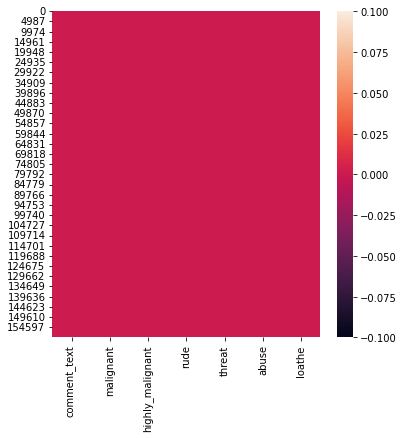

In [24]:
#Train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [6,6])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending = False))

comment_text    0
dtype: int64


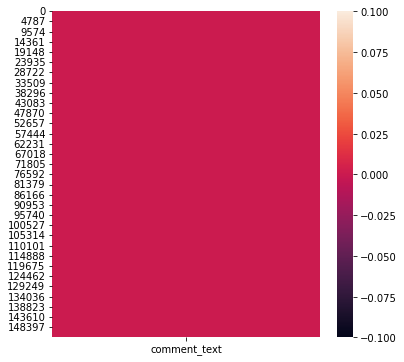

In [25]:
#Test data

plt.figure(figsize = [6,6])
sns.heatmap(test_data.isnull())
print(test_data.isnull().sum().sort_values(ascending = False))

There  are no missing values in train and test datasets.

### Data Visualization

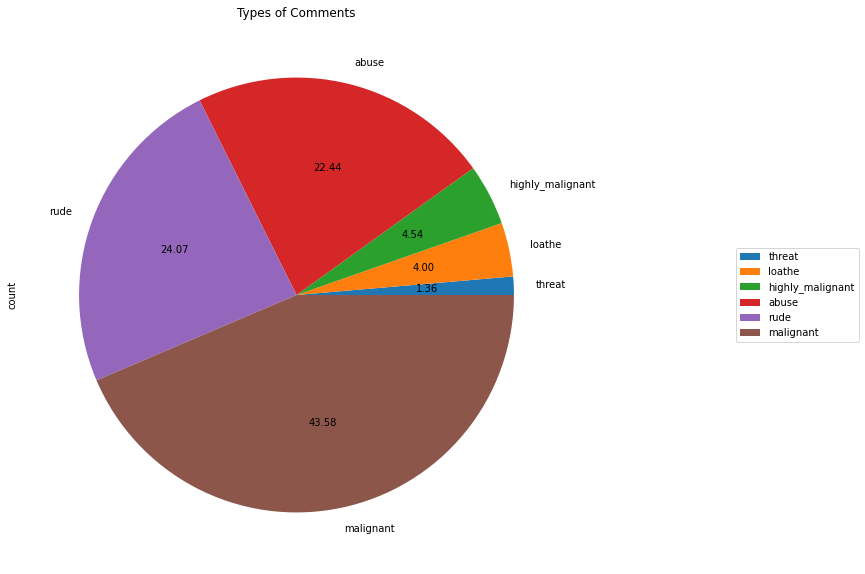

In [286]:
# Visualizing the of comments based on features using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = data[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Types of Comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

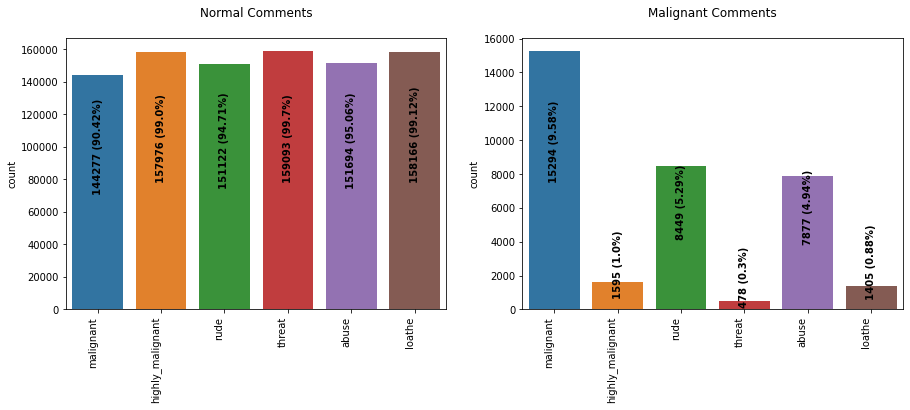

In [266]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
mali_cols = data.drop('comment_text', axis = 1).columns
for i in range(2):
    sns.countplot(data=data[mali_cols][data[mali_cols]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Normal Comments\n")
    else:
        ax[i].set_title("Malignant Comments\n")
        
    ax[i].set_xticklabels(mali_cols, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(data),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1


In [267]:
#User defined function to plot most frequent terms
from nltk import FreqDist

def freq_wor(x, terms):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

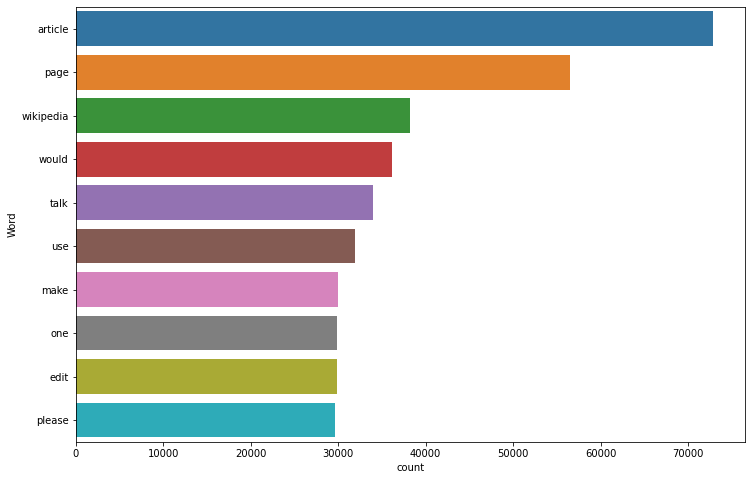

In [268]:
freq_wor(data['comment_text'],10)

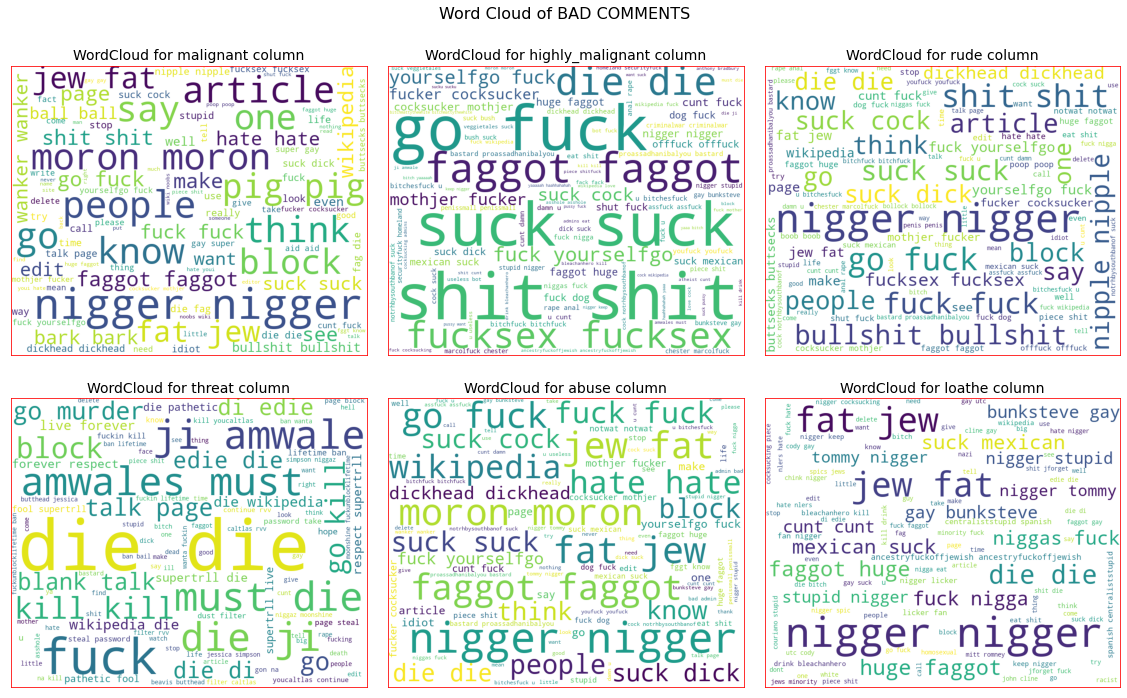

In [285]:
from wordcloud import WordCloud, STOPWORDS

p=1   

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(top=0.8, hspace=0.3)

for i in mali_cols:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="white",max_words=100).generate(' '.join(data.comment_text[data[i]==1]))
    ax = fig.add_subplot(2,3,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("Word Cloud of BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Observations:
    
* Malignant comments are comparitively higher than other features in the dataset. Rude and abusive comments are also more visible in the comments.
* Comments which are having threatening are comparatively low in the train dataset.
* As per the data, normal comments which are not malignant are having almost normal distribution for each type of features in the dataset.
* ['article', 'page', 'wikipedia'] are the words which are most frequent in the comments.
* The word cloud of the bad comments shows the loud words which have used by the users. The presence of these words are making the comments malignant.

### EDA Completed

In [25]:
x = data['comment_text']
y = data['malignant']
features = x.copy()
target = y.copy()
print(x.shape)
print(y.shape)

(159571,)
(159571,)


### Vectorizing the Text Data in Dataset

In [26]:
#using the n_gram tfidf vectorizer(Word vectors)

from sklearn.feature_extraction.text import TfidfVectorizer
word_vect = TfidfVectorizer(max_features = 2000)
features = word_vect.fit_transform(x).toarray()
sub_features = data.drop(['comment_text','malignant'], axis = 1).columns
features = pd.DataFrame(features)
features[sub_features] = data[sub_features]
features.shape

(159571, 2005)

In [27]:
# Convert text to vectors using TfidfVectorizer for test data
tfidf = TfidfVectorizer(analyzer = 'word', max_features=2005)
test_features = tfidf.fit_transform(test_data['comment_text']).toarray()
test_features.shape

(153164, 2005)

#### Splitting the data into features and target

In [28]:
from sklearn.model_selection import train_test_split
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.30, random_state = 1)

In [29]:
#lets check the shapes of traning and test data
print("features_train", features_train.shape)
print("features_test", features_test.shape)
print("target_train", target_train.shape)
print("target_test", target_test.shape)

features_train (111699, 2005)
features_test (47872, 2005)
target_train (111699,)
target_test (47872,)


### Checking whether the data is balanced or not

0    144277
1     15294
Name: malignant, dtype: int64


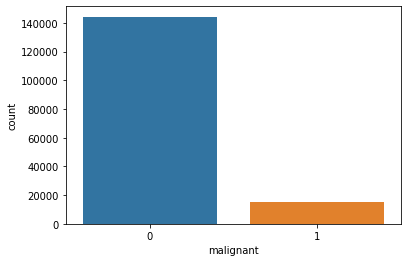

In [320]:
sns.countplot(y)
print(y.value_counts())

We can see that the data is not balanced. The data for non-malignant comments are more in the dataset. So we can balance the data using SMOTE over sampling method.

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
features_train, target_train = sm.fit_resample(features_train,target_train)
target_train

0         0
1         0
2         1
3         0
4         0
         ..
202195    1
202196    1
202197    1
202198    1
202199    1
Name: malignant, Length: 202200, dtype: int64

0    101100
1    101100
Name: malignant, dtype: int64


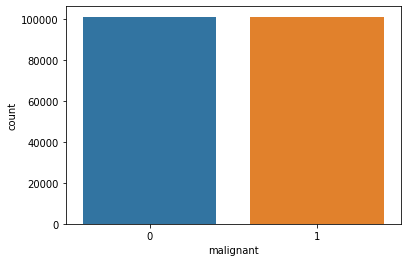

In [323]:
sns.countplot(target_train)
print(target_train.value_counts())

We can see the data has been balanced by oversampling the records using SMOTE technique.

### Building the Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, hamming_loss, log_loss

In [32]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
rfc = RandomForestClassifier()
lgb = LGBMClassifier()

In [33]:
#User defined function to train and test the model

def mod_test(model):
    print(model)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    sns.heatmap(confusion_matrix(target_test,pred_test), annot= True, fmt = '0.2f')
    print(classification_report(target_test,pred_test))
    print("Hamming Loss : ", hamming_loss(target_test,pred_test))

#### LogisticRegression

LogisticRegression()
Accuracy Score is  0.9181567513368984
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     43177
           1       0.55      0.84      0.67      4695

    accuracy                           0.92     47872
   macro avg       0.77      0.88      0.81     47872
weighted avg       0.94      0.92      0.93     47872

Hamming Loss :  0.08184324866310161


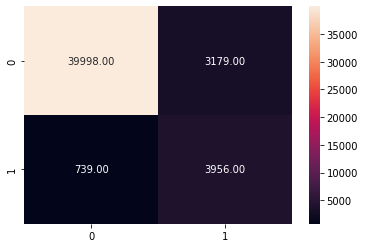

In [34]:
mod_test(lr)

#### DecisionTreeClassifier

DecisionTreeClassifier()
Accuracy Score is  0.9188252005347594
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     43177
           1       0.57      0.70      0.63      4695

    accuracy                           0.92     47872
   macro avg       0.77      0.82      0.79     47872
weighted avg       0.93      0.92      0.92     47872

Hamming Loss :  0.08117479946524064


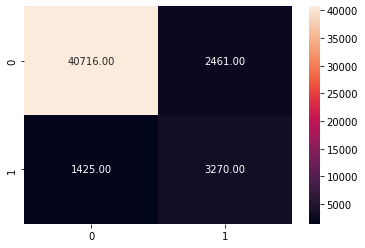

In [37]:
mod_test(dtc)

#### MultinomialNB

MultinomialNB()
Accuracy Score is  0.9540023395721925
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     43177
           1       0.78      0.74      0.76      4695

    accuracy                           0.95     47872
   macro avg       0.88      0.86      0.87     47872
weighted avg       0.95      0.95      0.95     47872

Hamming Loss :  0.04599766042780749


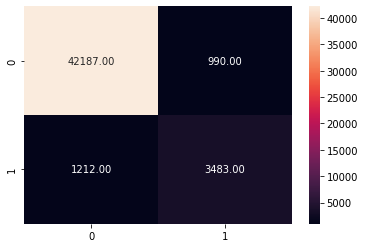

In [38]:
mod_test(mnb)

#### BernoulliNB

BernoulliNB()
Accuracy Score is  0.6742772393048129
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     43177
           1       0.22      0.90      0.35      4695

    accuracy                           0.67     47872
   macro avg       0.60      0.77      0.57     47872
weighted avg       0.91      0.67      0.74     47872

Hamming Loss :  0.3257227606951872


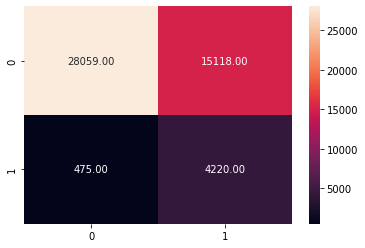

In [39]:
mod_test(bnb)

#### RandomForest Classifier

RandomForestClassifier()
Accuracy Score is  0.9547961229946524
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43177
           1       0.79      0.73      0.76      4695

    accuracy                           0.95     47872
   macro avg       0.88      0.85      0.87     47872
weighted avg       0.95      0.95      0.95     47872

Hamming Loss :  0.045203877005347594


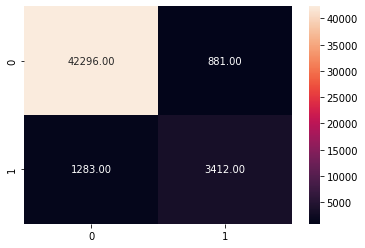

In [35]:
mod_test(rfc)

#### LGBMClassifier

LGBMClassifier()
Accuracy Score is  0.9513285427807486
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     43177
           1       0.74      0.78      0.76      4695

    accuracy                           0.95     47872
   macro avg       0.86      0.87      0.87     47872
weighted avg       0.95      0.95      0.95     47872

Hamming Loss :  0.048671457219251334


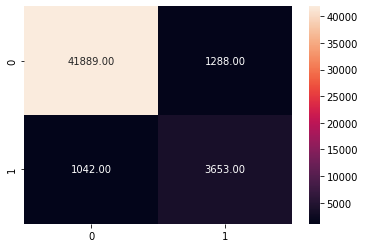

In [36]:
mod_test(lgb)

After training and testing the models, the Multinomial NB(mnb), RandomForest Classifier (rfc) and the LGBM Classifier(lgb) are performing well and providing the maximum accuracy score. Now let's check the cross validation score to find the best performing model.

### Cross Validation

In [39]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model):   
    cv_mean = 0
    cv_fold = 0
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    cv_score = cross_val_score(model,features, target, cv = 3)
    cv_mean =cv_score.mean()
    
    print(model)
    print("At cv fold",3," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [40]:
cross_val(lr)

LogisticRegression()
At cv fold 3  the cv score is  0.961860239683861 and the Accuracy Score  is  0.9181567513368984


#### DecisionTreeClassifier

In [41]:
cross_val(dtc)

DecisionTreeClassifier()
At cv fold 3  the cv score is  0.9463123000068568 and the Accuracy Score  is  0.9201620989304813


#### MultinomialNB

In [42]:
cross_val(mnb)

MultinomialNB()
At cv fold 3  the cv score is  0.9609954241872941 and the Accuracy Score  is  0.9537098930481284


#### BernoulliNB

In [43]:
cross_val(bnb)

BernoulliNB()
At cv fold 3  the cv score is  0.7552750404097978 and the Accuracy Score  is  0.6751128008021391


#### RandomForestClassifier

In [44]:
cross_val(rfc)

RandomForestClassifier()
At cv fold 3  the cv score is  0.9621422438099153 and the Accuracy Score  is  0.9551094585561497


#### LGBMClassifier

In [45]:
cross_val(lgb)

LGBMClassifier()
At cv fold 3  the cv score is  0.9630195989994622 and the Accuracy Score  is  0.9513285427807486


After all the training, testing and cross validations, the RandomForest Classifier(rfc) is performing well. The multinomial NB model and the LGBM model is also performing well, but the rfc model is slightly performing better than all the other models. So, we can consider this model as the best performing algorithm.

The rfc model is providing an accuracy score of 95.51% and a cross validation mean score of 96.21%.

Accuracy Score is  0.9548379010695187
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43177
           1       0.79      0.73      0.76      4695

    accuracy                           0.95     47872
   macro avg       0.88      0.85      0.87     47872
weighted avg       0.95      0.95      0.95     47872

Log Loss : 1.5598583850753633


<AxesSubplot:>

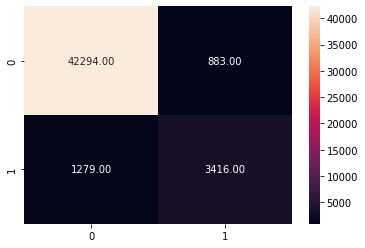

In [46]:
rfc = RandomForestClassifier()    
rfc.fit(features_train, target_train)
pred_test_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_rfc))
print(classification_report(target_test,pred_test_rfc))
print("Log Loss :", log_loss(target_test,pred_test_rfc))
sns.heatmap(confusion_matrix(target_test,pred_test_rfc), annot= True, fmt = '0.2f')

### AUC ROC Curve

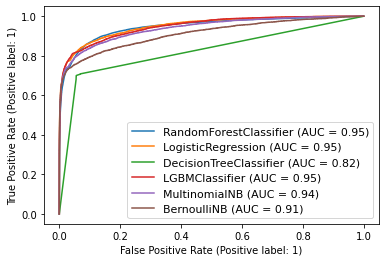

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve 

curve = plot_roc_curve(rfc,features_test,target_test)
plot_roc_curve(lr,features_test,target_test, ax=curve.ax_)
plot_roc_curve(dtc,features_test,target_test, ax=curve.ax_)
plot_roc_curve(lgb,features_test,target_test, ax=curve.ax_)
plot_roc_curve(mnb,features_test,target_test, ax=curve.ax_)
plot_roc_curve(bnb,features_test,target_test, ax=curve.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

The models ['rfc','lr','lgb'] are performing well and providing the maximum ROC AUC Score. Since the RandomForest Classifier model is performing slighlty better than all other models, we can consider the rfc model as the best performing model.

### Hyperparameter Tuning

In [47]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'criterion': ['gini','entropy', 'log_loss'],
             'max_features': [None,'sqrt', 'log2'],
             'n_estimators':[100,125,150]}

grid = HalvingGridSearchCV(estimator = RandomForestClassifier(),param_grid=parameters, cv = 3)

In [48]:
grid.fit(features_train, target_train)

HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(),
                    param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_features': [None, 'sqrt', 'log2'],
                                'n_estimators': [100, 125, 150]})

In [49]:
grid.best_score_

0.9840633903133904

In [50]:
grid.best_params_

{'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 150}

Accuracy Score is  0.9555063502673797
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43177
           1       0.84      0.67      0.75      4695

    accuracy                           0.96     47872
   macro avg       0.90      0.83      0.86     47872
weighted avg       0.95      0.96      0.95     47872

Log Loss : 1.5367659902585322
CV score is  0.9591279140664253


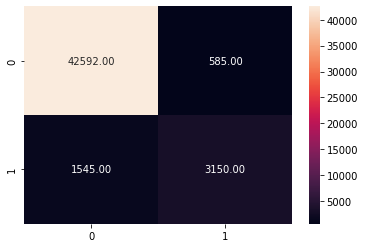

In [51]:
rfc = RandomForestClassifier(criterion = 'log_loss', max_features= 'log2',n_estimators=150)    
rfc.fit(features_train, target_train)
pred_test_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_rfc))
print(classification_report(target_test,pred_test_rfc))
print("Log Loss :", log_loss(target_test,pred_test_rfc))
sns.heatmap(confusion_matrix(target_test,pred_test_rfc), annot= True, fmt = '0.2f')
cv_score = cross_val_score(rfc,features,target, cv = 3)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

After the hyper parameter tuning the model is performing slightly better.

### The RandomForest Classifier (rfc) model is providing an accuracy score of 95.55% with a cross validation mean score of 95.91%. 

### Saving the Best Model

In [53]:
import pickle

filename = 'malignant_comment_classifier.pkl'
pickle.dump(rfc,open(filename,'wb'))

### Conclusion

### Predicting the target for test data

In [58]:
output = rfc.predict(test_features)
test_data_new = pd.DataFrame(test_data)
test_data_new['malignant'] = output
test_data_new.sample(10)

,comment_text,malignant
114402,see question answer,0
112690,my thought behind an apparent intention word b...,0
14387,email confuse anonymous edits do two place goo...,0
68907,personally find bit strange course difference ...,1
32994,stop stop add stupid shit picture pic fuck any...,0
115045,please vandalize page edit jeanbaptiste maunie...,0
34517,block yet vandalism,0
68942,mazda girlfriend totally biatch hate turtle ki...,0
86892,in term add information put completely word co...,0
5066,trivia he ridiculous plot actor come train day...,0


We have made the predictions of the target for the test dataset.

In [63]:
#Saving the new dataset
test_data_new.to_csv("Prediction on Test Dataset of Malignant Comments.csv", index=False)

#### Testing the model with predictions on train dataset

In [59]:
import numpy as np
original = np.array(target_test)
predicted = np.round(np.array(rfc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Target Result':original,'Predicted Result':predicted})
df_prediction.sample(10)

,Target Result,Predicted Result
27527,0,0
17482,0,0
9360,0,0
41597,0,0
45714,0,0
38606,0,0
28198,0,0
8818,0,0
6168,0,0
46463,1,1


Our model is performing well with predictions and provided accurate results.

Now this model can be used to detect whether a comment made by user is malignant in nature or not.

Review Rating Prediction model created.